In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head(7)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

In [6]:
internet_df.head(7)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN
6,Afghanistan,2008,1.840000,NaN


In [7]:
internet_df.shape

(4495, 4)

In [8]:
gdp_df.shape

(6870, 4)

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [11]:
gdp_df.tail(11)

,Country or Area,Year,Value,Value Footnotes
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN


In [12]:
internet_df.tail(11)

,Country or Area,Year,Value,Value Footnotes
4484,Zimbabwe,2003,6.394786,NaN
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [13]:
gpop = gdp_df.pop('Value Footnotes')

In [14]:
gdp_df = gdp_df.drop([6868, 6869])

In [15]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [16]:
internet_df.pop('Value Footnotes')

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4490   NaN
4491   NaN
4492   NaN
4493   NaN
4494   NaN
Name: Value Footnotes, Length: 4495, dtype: float64

In [17]:
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [18]:
gdp_df = gdp_df.rename(columns = {'Country or Area': "Country", 'Value' : 'GDP_Per_Capita'})

In [19]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


In [46]:
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', "Value": 'Internet_Users_Pct'})

In [47]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [48]:
gdp_df['Year'] = pd.to_numeric(gdp_df.Year)

In [56]:
gdp_and_internet_use = gdp_df.merge(right = internet_df, how = 'outer', on = ( 'Country', 'Year'))

In [57]:
pd.set_option('display.min_rows', 500)

In [58]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,6.390000
6,Afghanistan,2013,2116.465454,5.900000
7,Afghanistan,2012,2075.491747,5.454545
8,Afghanistan,2011,1904.559799,5.000000
9,Afghanistan,2010,1957.029338,4.000000


In [59]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


In [60]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


In [61]:
 gdp_and_internet_use = gdp_and_internet_use[gdp_and_internet_use['Year'].isin([2004,2009,2014])]

In [62]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
33,Albania,2004,7604.838002,2.420388
53,Algeria,2014,11512.705405,18.090000
58,Algeria,2009,10782.361398,11.230000
63,Algeria,2004,10058.435939,4.634475
83,Angola,2014,8239.828837,21.260000


In [63]:
Data_2004 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2004]

In [64]:
Data_2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544
153,Arab World,2004,11742.589407,NaN
183,Argentina,2004,18032.610491,16.036684
213,Armenia,2004,6472.131214,4.899009
241,Aruba,2004,38984.218383,23.000000
271,Australia,2004,41578.498520,NaN


In [65]:
Data_2009 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2009]

In [66]:
Data_2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.550000
28,Albania,2009,10346.864199,41.200000
58,Algeria,2009,10782.361398,11.230000
88,Angola,2009,7643.493749,6.000000
118,Antigua and Barbuda,2009,20046.839017,42.000000
148,Arab World,2009,13063.094140,NaN
178,Argentina,2009,21519.892554,34.000000
208,Armenia,2009,9052.389818,15.300000
236,Aruba,2009,35314.912883,58.000000
266,Australia,2009,44910.450858,74.250000


In [67]:
Data_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [68]:
Data_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39000
23,Albania,2014,11623.866679,60.10000
53,Algeria,2014,11512.705405,18.09000
83,Angola,2014,8239.828837,21.26000
113,Antigua and Barbuda,2014,18104.241470,64.00000
143,Arab World,2014,14219.562395,NaN
173,Argentina,2014,23550.099061,64.70000
203,Armenia,2014,11019.838785,46.30000
231,Aruba,2014,35458.608343,83.78000
261,Australia,2014,47436.748390,84.56000


In [105]:
Data_2014[['Country', 'Internet_Users_Pct']][Data_2014.Internet_Users_Pct == Data_2014.Internet_Users_Pct.max() ]

,Country,Internet_Users_Pct
2625,Iceland,98.16


In [106]:
Data_2014[['Country', 'Internet_Users_Pct']][Data_2014['Internet_Users_Pct'] == Data_2014['Internet_Users_Pct'].min() ]

,Country,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,0.0


In [113]:
Data_2014[['Country', 'Internet_Users_Pct']][Data_2014['Internet_Users_Pct'] == Data_2014['Internet_Users_Pct'].min() ]

,Country,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,0.0


In [115]:
Data_2009[['Country', 'Internet_Users_Pct']][Data_2009['Internet_Users_Pct'] == Data_2009['Internet_Users_Pct'].max()]

,Country,Internet_Users_Pct
2630,Iceland,93.0


In [116]:
Data_2009[['Country', 'Internet_Users_Pct']][Data_2009['Internet_Users_Pct'] == Data_2009['Internet_Users_Pct'].min()]

,Country,Internet_Users_Pct
7083,Dem. People's Rep. of Korea,0.0


In [118]:
Data_2004[['Country', 'Internet_Users_Pct']][Data_2004['Internet_Users_Pct'] == Data_2004['Internet_Users_Pct'].max()]

,Country,Internet_Users_Pct
6019,Sweden,83.89


In [123]:
Data_2004[['Country', 'Internet_Users_Pct']][Data_2004['Internet_Users_Pct'] == Data_2004['Internet_Users_Pct'].min()]

,Country,Internet_Users_Pct
7088,Dem. People's Rep. of Korea,0.0


In [125]:
Data_2014[Data_2014['GDP_Per_Capita'] == Data_2014['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.13385,NaN


In [127]:
Data_2014[['Country', 'GDP_Per_Capita']][Data_2014['GDP_Per_Capita'] == Data_2014['GDP_Per_Capita'].min()]

,Country,GDP_Per_Capita
1047,Central African Republic,822.610458


Text(0, 0.5, 'Internet_Users_Pct')

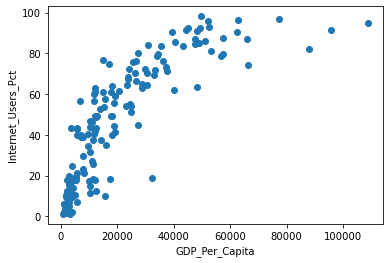

In [138]:
plt.scatter(Data_2014['GDP_Per_Capita'], Data_2014['Internet_Users_Pct'])
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')


Text(0, 0.5, 'Internet_Users_Pct')

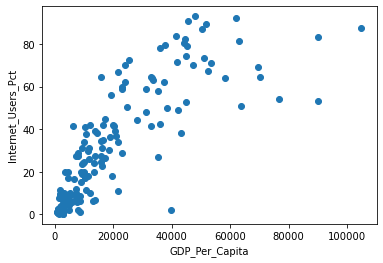

In [133]:
plt.scatter(Data_2009['GDP_Per_Capita'], Data_2009['Internet_Users_Pct'])
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')

Text(0, 0.5, 'Internet_Users_Pct')

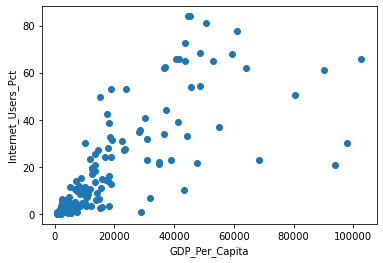

In [134]:
plt.scatter(Data_2004['GDP_Per_Capita'], Data_2004['Internet_Users_Pct'])
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')

the relationship gets stronger as time progressses. Pretty weak in 2004 and for 20k+ GDP per capitas in 2009. also, huge jump initially followed by reduced effect

Text(0.5, 0, 'GDP Per Capita')

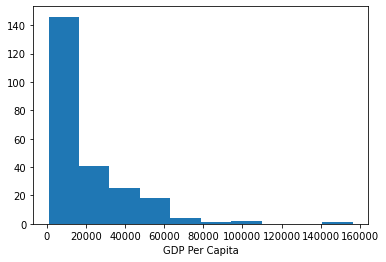

In [147]:
plt.hist(Data_2014['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita')

yes, unimodal

Text(0.5, 0, 'Internet Users Pct')

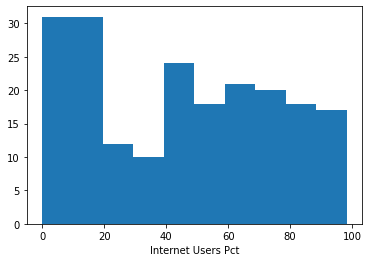

In [148]:
plt.hist(Data_2014['Internet_Users_Pct'])
plt.xlabel('Internet Users Pct')

less unimodal we see the mode between  0 and 20% and then a smaller mode around the 40%s with a slightly 
lower mode between 60 and 95%

In [173]:
Data_2014.nlargest(5, 'Internet_Users_Pct')


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


can also do

Data_2014.sort_values(by = 'Internet_Users_Pct', ascending = False).nlargest(5, 'Internet_Users_Pct')

